In [3]:
import torch
import torchvision

In [123]:
import os
import pathlib
from torchvision import transforms
from torch.utils.data import DataLoader

transform_origin = torchvision.transforms.Compose([
#     torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize([64, 64]),
#     torchvision.transforms.Normalize((0.485*255, 0.456*255, 0.406*255), (0.229, 0.224, 0.225))
])

transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize([64, 64]),
#     torchvision.transforms.Normalize((0.485*255, 0.456*255, 0.406*255), (0.229, 0.224, 0.225))
])

train_dataset_image = torchvision.datasets.STL10('/train', split='train', download=True, transform=transform_origin)
train_dataset = torchvision.datasets.STL10('/train', split='train', download=True, transform=transform)
test_dataset = torchvision.datasets.STL10('/test', split='test', download=True, transform=transform)

train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=128, shuffle=False)

classes = ["airplane", "bird", "car", "cat", "deer", "dog", "horse", "monkey", "ship", "truck"]

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [18]:
backbone = torchvision.models.resnet50(weights = torchvision.models.ResNet50_Weights.IMAGENET1K_V2)
torchvision.models.detection.mask_rcnn.MaskRCNN(backbone)

AttributeError: 'ResNet' object has no attribute 'out_channels'

In [74]:
weights = torchvision.models.detection.MaskRCNN_ResNet50_FPN_Weights
model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights=weights)
model.eval()

x = train_dataset[0][0].unsqueeze(0)
x
predictions = model(x)

C:\Users\admin\anaconda3\envs\torch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


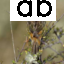

In [124]:
import bbox_visualizer as bbv
from PIL import Image

img = np.array(train_dataset_image[0][0])
bbox = [10, 20, 10, 10]
mg = bbv.draw_rectangle(img, bbox)
label = "ab"
img = bbv.add_label(img, label, bbox, top=True)

Image.fromarray(img)

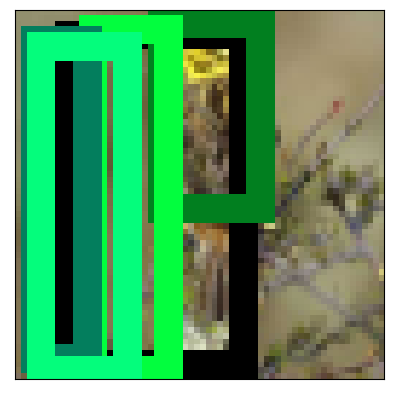

In [79]:
from torchvision.utils import draw_bounding_boxes
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import numpy as np
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
        
image = (train_dataset[0][0]*255).type(torch.uint8)
boxes = torch.tensor([[ 7.4649,  2.7655, 41.7331, 63.5029],
          [23.5324,  0.3798, 44.7102, 36.4095],
          [11.4511,  1.8813, 28.3205, 64.0000],
          [ 1.0580,  3.1094, 14.6100, 62.9259],
          [ 2.1185,  4.4252, 21.9859, 64.0000]], dtype=torch.float)
colors = ["blue", "yellow"]
# result = draw_bounding_boxes(image, boxes, colors=colors, width=5)
result = draw_bounding_boxes(image, boxes, width=5)
show(result)

In [53]:
from torchvision.io import read_image

In [58]:
image = read_image("test.jpg")

In [57]:
dog1_int.shape
dog1_int.dtype

torch.uint8

tensor([[[146, 146, 146,  ..., 162, 162, 162],
         [146, 146, 146,  ..., 162, 162, 162],
         [146, 146, 146,  ..., 163, 163, 163],
         ...,
         [132, 141, 128,  ..., 139, 140, 138],
         [134, 133, 120,  ..., 138, 139, 137],
         [135, 111, 104,  ..., 143, 143, 138]],

        [[143, 143, 143,  ..., 159, 159, 159],
         [143, 143, 143,  ..., 158, 158, 158],
         [143, 143, 143,  ..., 158, 158, 158],
         ...,
         [116, 126, 114,  ..., 130, 126, 120],
         [118, 118, 106,  ..., 128, 126, 123],
         [119,  96,  90,  ..., 132, 133, 128]],

        [[110, 110, 110,  ..., 126, 126, 126],
         [110, 110, 110,  ..., 126, 126, 126],
         [110, 110, 110,  ..., 126, 126, 126],
         ...,
         [ 86,  85,  68,  ..., 119, 118, 105],
         [ 96,  89,  70,  ..., 117, 111,  96],
         [110,  81,  67,  ..., 120, 111,  93]]], dtype=torch.uint8)

In [61]:
image.type(torch.uint8)

tensor([[[196, 196, 196,  ..., 159, 159, 159],
         [196, 197, 197,  ..., 159, 159, 159],
         [197, 197, 198,  ..., 159, 159, 159],
         ...,
         [187, 201, 212,  ...,  67,  67,  67],
         [191, 204, 214,  ...,  66,  66,  66],
         [194, 207, 215,  ...,  65,  65,  65]],

        [[191, 191, 191,  ..., 101, 101, 101],
         [191, 192, 192,  ..., 101, 101, 101],
         [192, 192, 193,  ..., 101, 101, 101],
         ...,
         [160, 174, 185,  ...,  31,  31,  31],
         [164, 177, 187,  ...,  30,  30,  30],
         [167, 180, 188,  ...,  29,  29,  29]],

        [[185, 185, 185,  ...,  53,  53,  53],
         [185, 186, 186,  ...,  53,  53,  53],
         [186, 186, 187,  ...,  53,  53,  53],
         ...,
         [131, 144, 155,  ...,   0,   0,   0],
         [135, 147, 157,  ...,   0,   0,   0],
         [138, 150, 158,  ...,   0,   0,   0]]], dtype=torch.uint8)